In [37]:
import pandas as pd 
import numpy as np
import keras
import math 
import random 

from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [38]:
df = pd.read_csv("TSLA-d.csv", index_col=0)
df.pop("Volume")
df["Range"] = (df["High"] - df["Low"]) / df["Open"]
df.pop("Open")
df.pop("High")
df.pop("Low")

Date
2010-06-29      1.169333
2010-06-30      1.553333
2010-07-01      1.351333
2010-07-02      1.247333
2010-07-06      1.055333
                 ...    
2023-03-27    189.940002
2023-03-28    185.429993
2023-03-29    189.440002
2023-03-30    194.419998
2023-03-31    197.199997
Name: Low, Length: 3212, dtype: float64

In [39]:
df.head()

,Close,Adj Close,Range
Date,,,
2010-06-29,1.592667,1.592667,0.392632
2010-06-30,1.588667,1.588667,0.276076
2010-07-01,1.464000,1.464000,0.226000
2010-07-02,1.280000,1.280000,0.190870
2010-07-06,1.074000,1.074000,0.208500


In [40]:
# CALCULATE ABSOLUTE DIFFERENCE 
'''
Now for the closing price ('Adj Close' column), again noone cares about the absolute price from day to do, 
what one cares about is the change in price from day to day. We can get that with the following line: 
'''
df['Abs Change'] = df["Adj Close"].diff()

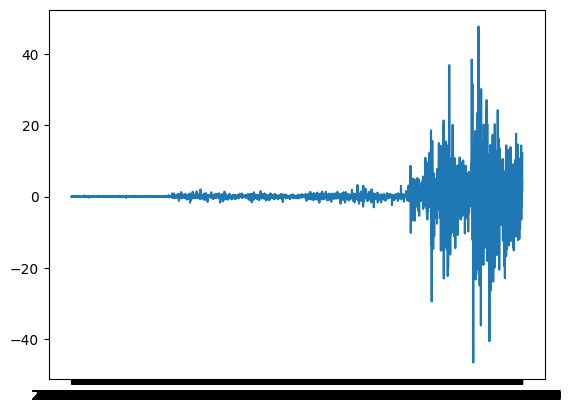

In [41]:
# PLOT ABSOLUTE DIFFERENCE 

'''
But the problem is evident when we plot this over time. We can see that as the price rose over the years, the 
average daily change also increased, naturally. This is not ideal data to feed into a model, because 
(as you can see) earlier values will be de-emphasized to the point of nearly being ignored, whereas later 
data points will be overemphasized in relation. Since we would like the model to be able to glean meaningful 
data from the entire dataset, this is less than ideal. 
'''
plt.plot(df['Abs Change'])

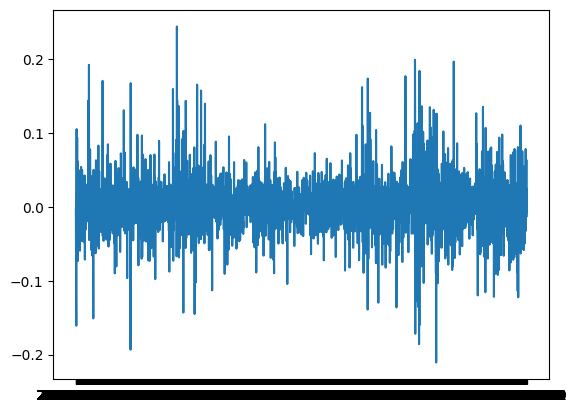

In [42]:
# CALCULATE PCT CHANGE
'''
Instead, the percentage change is what we want. It's less likely to have a trend, and we can see this visually
by plotting. 
'''
df['Change'] = df["Adj Close"].pct_change()
plt.plot(df['Change'])

In [43]:
# FIRST ROW HAS NAN 
'''
Note that the very first value for the Pct Change column is a NaN. The reason is that to get this column, each 
value in the source column was compared to its previous timestep, and the first record has no previous to which 
to compare. We can fix this just by either removing 
'''
df.head()

,Close,Adj Close,Range,Abs Change,Change
Date,,,,,
2010-06-29,1.592667,1.592667,0.392632,NaN,NaN
2010-06-30,1.588667,1.588667,0.276076,-0.004000,-0.002512
2010-07-01,1.464000,1.464000,0.226000,-0.124667,-0.078473
2010-07-02,1.280000,1.280000,0.190870,-0.184000,-0.125683
2010-07-06,1.074000,1.074000,0.208500,-0.206000,-0.160937


In [44]:
# FIX NAN BY REMOVING FIRST ROW 
'''
We can fix this just by either removing the entire first row, or by fixing the value itself (comparing it to
the Open price should be reasonable and not cause any harm. 
'''
# remove row
print('len before:', len(df))
df = df. tail(-1) 
print('len after:', len(df))
df.head()

len before: 3212
len after: 3211


,Close,Adj Close,Range,Abs Change,Change
Date,,,,,
2010-06-30,1.588667,1.588667,0.276076,-0.004000,-0.002512
2010-07-01,1.464000,1.464000,0.226000,-0.124667,-0.078473
2010-07-02,1.280000,1.280000,0.190870,-0.184000,-0.125683
2010-07-06,1.074000,1.074000,0.208500,-0.206000,-0.160937
2010-07-07,1.053333,1.053333,0.100610,-0.020667,-0.019243


In [45]:
# REMOVE UNNECESSARY COLUMNS
df.pop("Close")
df.pop("Abs Change")

Date
2010-06-30    -0.004000
2010-07-01    -0.124667
2010-07-02    -0.184000
2010-07-06    -0.206000
2010-07-07    -0.020667
                ...    
2023-03-27     1.399994
2023-03-28    -2.619996
2023-03-29     4.690003
2023-03-30     1.399994
2023-03-31    12.180008
Name: Abs Change, Length: 3211, dtype: float64

In [46]:
df.head()

,Adj Close,Range,Change
Date,,,
2010-06-30,1.588667,0.276076,-0.002512
2010-07-01,1.464000,0.226000,-0.078473
2010-07-02,1.280000,0.190870,-0.125683
2010-07-06,1.074000,0.208500,-0.160937
2010-07-07,1.053333,0.100610,-0.019243
